### Chapter 6.4
# GI/GI/1 Idle Time Distribution
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

In a GI/GI/n queueing system, the long-term average fraction of idle time for any server is $(1-\rho)$. Consider here the duration of an idle period for the GI/GI/1 queue which is denoted by the random variable $I$. It is tempting to assume that (a) the long-term average fraction of idle time $(1-\rho)$ during two arrivals with mean interarrival time $E[A]$ and (b) the expected idle time $E[I]$ are identical. However, this relation is not valid, since the idle time only manifests after the end of a busy period (composed of several service times and smaller interarrival times; a larger interarrival time ends the busy period and yields an idle period). In fact, the following inequality holds:

$ \displaystyle
E[I] \; \geq \; E[A]-E[B] = (1-\rho)E[A]
$

We use the following notation for the random variables (r.v.):

| <div style="width:1px">r.v.</div> | <div style="width:400px">explanation</div> |
| :-| :----------------------------------------------------------------------- | 
|$A_n$  |  interarrival time between customer $n$ and customer $n+1$,|
|$B_n$  | service time of the $n$-th customer, |
|$U_n^-$ | unfinished work immediately *before* the arrival of the $n$-th customer, |
|$U_n^+$ | unfinished work immediately *after* the arrival of the $n$-th customer, |
|$U_{n+1}^v$ | *virtual unfinished work* immediately before the arrival of the customer $n+1$. |

 
## Computation of the Idle Time Distribution
The idle time $I_n$ after the completion of the $n$-th customer is a conditional r.v. which is simply the negative part ($k<0$) of the virtual unfinished work $U^v_{n+1}$ immediately before the arrival of the customer $n + 1$. Let us define $Y_{n+1}$ as the difference between the interarrival time $A_n$ and the unfinished work $U_n^+$ immediately after arrival of customer $n$. Then the idle time $I_n$ is the conditional r.v. that there is a positive idle time (otherwise, for $Y_n\leq 0$, the system is in a busy period). Hence, $I_n=Y_n | Y_n>0$.

$ \displaystyle
 U^v_{n+1} = U_n^+ - A_n = U_n^- + B_n-A_n \\
 Y_{n} = -U^v_{n+1} = A_n - (U_n^- + B_n) \\
 I_{n} =  Y_{n} | Y_{n}>0 \\
 i_{n}(k) = \begin{cases} \displaystyle
\frac{a_n(k) * u_n(-k) * b_n(-k) }{ P(Y_{n}>0)} & \text{ for } k>0 \\
0 & \text{otherwise}
\end{cases}
$

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from discreteTimeAnalysis import *
import math

A = DU(1,9) # interarrival time
B = DU(2,7) # service time

C = B-A
negC = A-B

rho = B.mean()/A.mean()
print(f'System utilization: rho={rho:.2f}');

System utilization: rho=0.90


## Iterative Computation 
We iteratively compute the idle time distribution, until the distribution $I$ reaches the steady state.

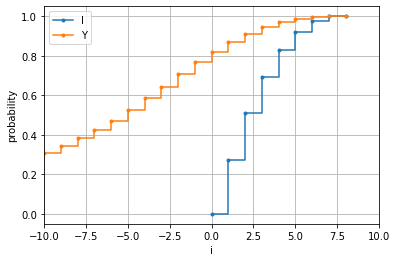

In [46]:
Un1 = DET(0) # empty system
Un = DET(1)  # just for initialization

condition = lambda k: k>0
# iterative computation
while Un != Un1: # comparison based on means of the distributions
    Un = Un1    
    Yn = negC-Un
    In = Yn | condition
    Un1 = max( Un+C ,0)

In.plotCDF(label='I')
Yn.plotCDF(label='Y')
plt.grid(which='major')
plt.xlim([-10, 10])
plt.xlabel('i')
plt.ylabel('probability')
plt.legend();

## Interdeparture Time

The following mixture distribution characterizes the interdeparture time $D_n$:

$ \displaystyle
 D_n = \begin{cases}
 I_n + B_n & \text{with probability } \; p_I\\
  B_n & \text{with probability } \; 1-p_I
\end{cases}
$

with probability mass function

$ \displaystyle
 d_n(k) = p_I  (i_n(k)*b_n(k)) + (1-p_I) b_n(k) \; .
$

Note that the probability that an arriving customer finds the system empty is then also $p_I = 1-p_W = w(0)$ with the waiting time $W$ corresponding to the unfinished work $U$. It is

$ \displaystyle
p_I = \frac{E[A]-E[B]}{E[I]}
$


In [47]:
pI = (A.mean()-B.mean())/In.mean()
w0 = Un.cdf(0)

print(f'p_I  = {pI}')
print(f'w(0) = {w0}')

p_I  = 0.17901445668020782
w(0) = [0.23396372]
